In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
%matplotlib inline

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

img_width, img_height = 220, 220
n_classes = 2
#train_data_dir = '/home/kazzastic/Desktop/CV/Deep Learning/data/train'

Mounted at /content/drive


In [0]:
train_data_dir = '/content/drive/My Drive/train'
#validation_data_dir = '/content/drive/My Drive/test'

In [0]:
# Pixel values rescaling from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.1)
batch_size = 32

# Retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        shuffle = True,
        batch_size=batch_size,
        #class_mode='binary',
        subset = 'training')

validation_generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        shuffle = True,
        batch_size=batch_size,
        #class_mode='binary',
        subset = 'validation')


Found 7624 images belonging to 2 classes.
Found 846 images belonging to 2 classes.


In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam 
#import pickle
import time

model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(220,220,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))


model.add(Conv2D(64, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))

model.add(Conv2D(128, (5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = 2))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('softmax'))

#tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 216, 216, 32)      2432      
_________________________________________________________________
activation_3 (Activation)    (None, 216, 216, 32)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 108, 108, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 104, 104, 64)      51264     
_________________________________________________________________
activation_4 (Activation)    (None, 104, 104, 64)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 128)      

In [0]:
epochs = 14
#train_samples = 8470
#validation_samples = 621

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
# Model saving callback

checkpointer = ModelCheckpoint(filepath='basic_cnn.h5', monitor='val_acc', verbose=1, save_best_only=True)

# Early stopping
early_stopping = EarlyStopping(monitor='val_acc', verbose=1, patience=5)

history = model.fit_generator(
        train_generator,
        steps_per_epoch=32,
        epochs=epochs,
        validation_data = validation_generator,
        validation_steps = 32,
        callbacks=[checkpointer, early_stopping],
        verbose=1)

Epoch 1/14
32/32 [==============================] - 527s 16s/step - loss: 0.3856 - acc: 0.8370

Epoch 00001: val_acc improved from -inf to 0.83698, saving model to basic_cnn.h5
32/32 [==============================] - 1157s 36s/step - loss: 0.6368 - acc: 0.6807 - val_loss: 0.3856 - val_acc: 0.8370
Epoch 2/14
32/32 [==============================] - 296s 9s/step - loss: 0.4238 - acc: 0.8300

Epoch 00002: val_acc did not improve from 0.83698
32/32 [==============================] - 763s 24s/step - loss: 0.4569 - acc: 0.8174 - val_loss: 0.4238 - val_acc: 0.8300
Epoch 3/14
32/32 [==============================] - 295s 9s/step - loss: 0.3810 - acc: 0.8300

Epoch 00003: val_acc did not improve from 0.83698
32/32 [==============================] - 727s 23s/step - loss: 0.3579 - acc: 0.8662 - val_loss: 0.3810 - val_acc: 0.8300
Epoch 4/14
32/32 [==============================] - 295s 9s/step - loss: 0.3226 - acc: 0.8529

Epoch 00004: val_acc improved from 0.83698 to 0.85288, saving model to bas

In [0]:
model.save("NIC-CNN.model")

In [0]:
#Prediction:
CATEGORIES = ["NIC", "WHITE-HOUSE"]

model = tf.keras.models.load_model("NIC-CNN.model")
'''
test_data_dir='/content/drive/My Drive/test'
validgen = ImageDataGenerator(horizontal_flip=False)
test_gen = validgen.flow_from_directory(
         test_data_dir,
         target_size=(220, 220),
         batch_size=1,
         class_mode='binary',
         shuffle=False)
         #color_mode= "grayscale")
'''
preds = model.predict_(test_gen)
yea = []
for i in range(len(preds)):
  if(preds[i][0] == 1):
    yea.append(CATEGORIES[0])
  else:
    yea.append(CATEGORIES[1])
print(preds[8][0])
print(np.asarray(yea))

Found 16 images belonging to 2 classes.
0.0
['NIC' 'NIC' 'NIC' 'NIC' 'NIC' 'NIC' 'NIC' 'NIC' 'WHITE-HOUSE'
 'WHITE-HOUSE' 'NIC' 'NIC' 'NIC' 'NIC' 'NIC' 'WHITE-HOUSE']


In [0]:
import cv2
import tensorflow as tf
#from google.colab.patches import cv2_imshow

CATEGORIES = ["WHITE-HOUSE", "NIC"]


def prepare(filepath):
    IMG_SIZE = 220 # 50 in txt-based
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)


model = tf.keras.models.load_model("NIC-CNN.model")

prediction = model.predict([prepare('/content/drive/My Drive/test/WHITE-HOUSE/z9.jpg')])
print(prediction)  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])

[[0. 1.]]
WHITE-HOUSE


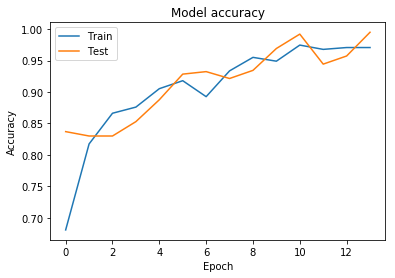

In [0]:
fig, ax = plt.subplots()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig.savefig('basic_cnn.svg', format='svg', dpi=1200)

In [0]:
loaded_model = tf.keras.models.load_model('basic_cnn.h5')
loaded_model.layers[0].input_shape[1:] #(None, 160, 160, 

(220, 220, 3)

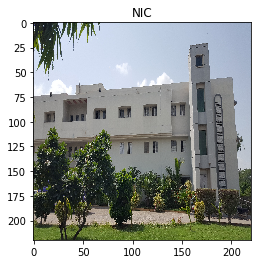

In [0]:
from keras.preprocessing import image
IMG_SIZE = 220
cat = ["NIC", "WHITE-HOUSE"]
image_path="/content/20191001_120234_005_01.jpg"
img = image.load_img(image_path, target_size=(IMG_SIZE, IMG_SIZE))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=loaded_model.predict_classes(img)
plt.title(cat[int(result)])
plt.show()